In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import sys 
sys.path.append('./models/')
from Model import Model 
from moving_average import MovingAverage

Importing data

In [2]:
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [5]:
mymodel=MovingAverage()
split=30
mymodel.train(dates_of_pandemic[:split], new_deaths[:split])

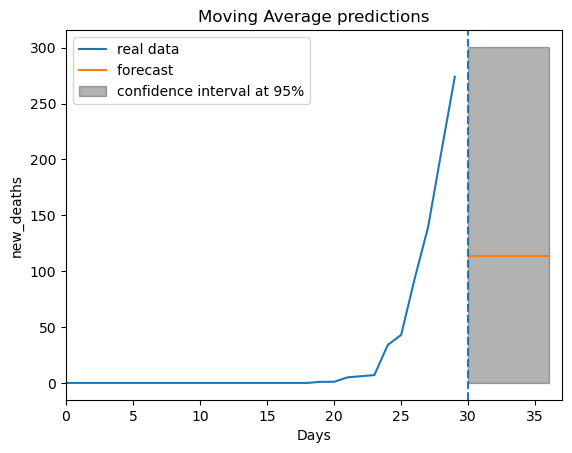

In [6]:
mymodel.plot(7, 0.05, title='Moving Average predictions', xlabel='Days', ylabel='new_deaths')